## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
# df.user_id.unique()
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
# df.query('converted == 1').user_id.mean()
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
df.query("group == 'treatment' and not landing_page == 'new_page' or group == 'control' and landing_page == 'new_page'").count()[0]

3893

f. Do any of the rows have missing values?

In [7]:
df.isnull().sum() 

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2 = df.copy()

In [9]:
no_matches = df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].index

In [10]:
df2.drop(no_matches, inplace=True)

In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [12]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [13]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [15]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
duplicate_user = df2[df2.user_id.duplicated()].index # save duplicated row index to variable name 

In [17]:
df2.drop(duplicate_user, inplace=True) # drop duplicated user_id row 

In [18]:
df2[df2.user_id.duplicated()] # check to confirm duplicate removed

,user_id,timestamp,group,landing_page,converted


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [19]:
df2.query("converted == 1").count()[0]/ df2.converted.shape[0]*100

11.959708724499627

b. Given that an individual was in the `control` group, what is the probability they converted?

In [20]:
df2.query("group == 'control' and converted == 1").count()[0] /df2.query("group == 'control'").count()[0]*100

12.038630450046121

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [21]:
df2.query("group == 'treatment' and converted == 1").count()[0]/ df2.query("group == 'treatment'").count()[0]*100

11.880806551510565

d. What is the probability that an individual received the new page?

In [22]:
df2.query("landing_page == 'new_page'").count()[0] / df2.landing_page.shape[0]*100

50.00619442226688

In [23]:
df2[df2['converted']==1].count()[0] / df2.converted.shape[0]*100

11.959708724499627

In [24]:
df2[df2['converted']==0].count()[0] / df2.converted.shape[0]*100

88.040291275500365

In [25]:
treatment = df2[df2['group'] == 'treatment']['converted'].mean()
control =  df2[df2['group'] == 'control']['converted'].mean()
obs_diff = control - treatment # observed differnces in the means
obs_diff*100

0.15782389853555567

In [26]:
import datetime
df2.timestamp.max(), df.timestamp.min() # getting min, max of timestamps

('2017-01-24 13:41:54.460509', '2017-01-02 13:42:05.378582')

In [27]:
df2.timestamp = pd.to_datetime(df2['timestamp']) # group by sort timestamp 
df2.timestamp.astype(str) 
df2.groupby('timestamp')

In [28]:
df2.groupby('timestamp')
df2.sort_values('timestamp', ascending=False)

,user_id,timestamp,group,landing_page,converted
193652,920411,2017-01-24 13:41:54.460509,control,old_page,0
179072,836373,2017-01-24 13:41:52.604673,control,old_page,0
157787,843121,2017-01-24 13:41:44.097174,treatment,new_page,0
47535,808330,2017-01-24 13:41:19.152664,control,old_page,0
158814,799244,2017-01-24 13:41:15.325359,treatment,new_page,0
180924,808180,2017-01-24 13:41:07.867394,control,old_page,0
29690,787704,2017-01-24 13:41:04.416938,treatment,new_page,0
260161,712000,2017-01-24 13:40:54.479759,control,old_page,1
178372,891992,2017-01-24 13:40:37.103733,control,old_page,0
24692,725007,2017-01-24 13:40:23.844184,control,old_page,0


In [29]:
end = '2017-01-24'
start = '2017-01-02'       

In [30]:
from datetime import datetime
def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days)

In [31]:
days_between(start, end) # get duration of A/B test period

22

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

In this dataset which spanned over the course of `22` days, we had `290584` unique users, where the probability that they convert regardless of what page they recieved either, `landing_page` or `old_page`, was `11.95%`. If the user was in the `control` group the probability they'd convert was `12.03%` while if the user was in the `treatment` group their probability of conversion was `11.88%`. Finally the probability the user received the `new_page` was `50%`. 

Calculating the `observed difference` between the conversion rates we get about a `0.0015` difference which is minimal but, in order to deem `statistically significant` we would have to perform a `bootstrap` on the sample to "simulate the sampling distributions for the difference in proportions" (cite 1).

With these findings it is difficult to say which page leads were more effective. 

As we learned in the `A/B Tests` lesson there are important questions to consider when concluding results from our statistics. We haven't yet introduced `Hypothesis Testing` in which we would introduce sampling, and other techniques to show more useful metrics.  

In conclusion, the next best option is to continue with the testing but, for a longer duration to rule out `response bias` or `change aversion` and begin with `Hypothesis Testing` to look at new metrics like `p-values`, `confidence intervals`, etc. 


> Citations:
1. https://classroom.udacity.com/nanodegrees/nd002/parts/bb0cbeb6-d3f8-4bae-9dc3-4abba3823e54/modules/82c7c576-88f5-43b6-80fc-c53378527a2d/lessons/f3088061-6562-445e-b1a7-a86c9389c2b5/concepts/0fc48912-c4a4-498a-9217-b44330857e52

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

1. **Null Hypothesis**: 
> $$H_0:   p_{old}  \leq   p_{new} >     Type I Error Rate .05 $$
2. **Alternative Hypothesis**: 
> $$H_1: p_{new}  \geq  p_{old}  < Type I Error Rate of .05 $$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

1. **Null Hypothesis**: 
> $$H_0:  \mu_{old} - \mu_{new} = 0$$
2. **Alternative Hypothesis**: 
> $$H_1: \mu_{old} - \mu_{new} \neq 0$$

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [32]:
df2.converted.mean()

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [33]:
df2.converted.mean()

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [34]:
df2.query("group == 'treatment'").user_id.nunique()

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [35]:
df2.query('group == "control"').user_id.nunique()

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [36]:
new_page_converted = df2.converted.mean()

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [37]:
old_page_converted = df2.converted.mean()

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [38]:
obs_diff = new_page_converted - old_page_converted # observed difference 
obs_diff

0.0

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [39]:
p_diffs = []
size = df2.shape[0]
n_new = df2.query('landing_page == "new_page"').shape[0]
n_old = df2.query('landing_page == "old_page"').shape[0]
p_new = df2.converted.mean()
p_old = df2.converted.mean() 
n_new, n_old, p_new, p_old

(145310, 145274, 0.11959708724499628, 0.11959708724499628)

In [40]:
for _ in range(10000):
    sample_set = df2.sample(size, replace=True)
    new_page_converted = np.random.choice([0,1], size=n_new, p=[(1-p_new), p_new])
    old_page_converted = np.random.choice([0,1], size=n_old, p=[(1-p_old), p_old])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

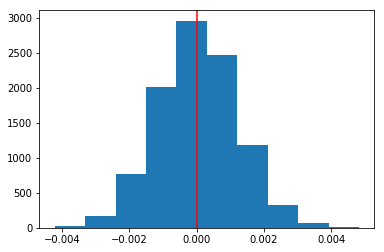

In [41]:
plt.hist(p_diffs); 
# plot line for observed statistic
plt.axvline(obs_diff, c='red');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [42]:
p_value = (p_diffs > obs_diff).mean()
print(p_value)

if p_value<0.05:
    print("reject null hypothesis")
else:
    print("fail to reject null hypothesis")

0.5046
fail to reject null hypothesis


k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

In part `j` we calcluated what is known as the **p value** which is a number between `0` and `1` to determine if your null hypothesis is statistically significant which if it is, this allows us to reject the null hypothesis. When "your null hypothesis is true, the statistical summary would be greater than or equal to the actual observed results" (cite 1). 

In this case the **p value** is greater than the `alpha` of `.05` so we deem this as not statistically significant and we fail to reject the null hypothesis. 

In conclusion, we should go back to our business logic and see if there are any new ways in which we should try other testing techniques such as lengthening the duration of each test period and or including more varied types of users.

> Citations:
1. https://en.wikipedia.org/wiki/P-value

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [45]:
from pandas.core import datetools
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page" and converted == 1').shape[0]
convert_new = df2.query('landing_page == "new_page" and converted == 1').shape[0]

n_old = df2.query('landing_page == "old_page"').user_id.count()
n_new = df2.query('landing_page == "new_page"').user_id.count()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [46]:
from statsmodels.stats.proportion import proportions_ztest
# count : the number of successes in nobs trials. 
# nobs : number of trials or observations, with the same length as count.

count = [convert_new, convert_old]
nobs = [n_new, n_old] 
stat, pval = sm.stats.proportions_ztest(count, nobs, alternative = 'larger')
print(float(pval), stat)

if pval<0.05:
    print("reject null hypothesis")
else:
    print("fail to reject null hypothesis")

0.9050583127590245 -1.31092419842
fail to reject null hypothesis


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The results from our `proportions_ztest` were a **p-value** of `.905` and **z-score** of `-1.31`. 

The **z-score** is the number of standard deviations our data points are  away from the mean (cite 1). We calculate this by subtracting our data points from the mean from and then dividing by the our standard deviation. In this exercise I am learning about the different types of hypothesis tests we can use on `population parameters`, such as, `t-tests, z-tests, ANOVA and chi-square` tests, to name a few (cite 2). When we use a `z-test` some requirements are random selection, equal sample sizes, normally distributed data, and independent data points. `Z-tests` are used to test whether a `population parameter (σ²)` is significantly different from our hypothesis value and as a formula looks like this (cite 3): $$z = (x – μ) / σ$$ 

We set up our null and alternate hypothesis as equal or not equal, where the null proposes conversion rate was the same for both users who had landed on our "old" page and for users who landed on our "new" page. While the alternative proposes either the "old" or the "new" would lead to more conversions. Our **p-value** in these cases would be the shaded left and right tail regions of our graph as well. 

Our **p-value** here indicates we stay with our null hypothesis as final outcome.

Our **z-score** derived from a one-sided `z-test`, was a negative which means it was below the mean and we could say our conversion rates were lower than average. Rather, also our mean is greater than our data point or even our data point minus our mean is negative. Our area to the left of this negative **z-score** using a `z-table` is `0.0951` derived from the negative `z-table` at `-1.3` and `.01` (cite 5).

In part `j`and `k` our **p-value** was `0.4961` and so we failed to reject null hypothesis. Here in this part `m` our p-value was `.905` and we also fail to reject the null hypothesis. In part `k` I noted to possible other ways in which to re-test using different user groups, duration of testing, as possible solutions to getting higher conversion rates.

In conclusion, some questioning strategies we learned in lesson 12, video 27 of `Hypothesis Testing` states, "Is my sample representative of the population to ensure everyone is acurately represented in my sample?, What is the impact of the sample size on my results?" (cite 6). The instructor notes that in our world today of big data there has been a shift in considering hypothesis testing because sample sizes play a significant factor in results and we need more than just the `average` of sample sizes. Thus, we introduce new approaches that include machine learning techniques either supervised or unsupervised.


> Citations: 
1. https://www.khanacademy.org/math/ap-statistics/density-curves-normal-distribution-ap/measuring-position/v/z-score-introduction
2. https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce
3. https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/z-score/
4. http://www.z-table.com/t-value-table.html
5. https://www.thoughtco.com/calculate-probabilities-standard-normal-distribution-table-3126378
6. https://classroom.udacity.com/nanodegrees/nd002/parts/bb0cbeb6-d3f8-4bae-9dc3-4abba3823e54/modules/82c7c576-88f5-43b6-80fc-c53378527a2d/lessons/ad8aca80-f444-4479-8848-5b07bafaf66c/concepts/9359bb35-975b-42b6-a8c0-de576c3267f3

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

From the two main branches of machine learning as `supervised` or `unsupervised`, and given our dataset with a simple encoding of `1` as converted and `0` as not converted, we would move toward `supervised` learning using `linear` and `logistic` regression would be the types of regression used in this case. In our lesson 15, we learned about `multiple linear` regression as creating a matrix of inputs and a vector of the response to predict. In this case, we can compare more than two quantitative variables and even categorical as well thru encoding with dummy variables. This is best visualized as a scatter plot with a slope, intercept and correlation coeffecient.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [47]:
from sklearn.preprocessing import LabelEncoder

ab_page = LabelEncoder()
df2["ab_page"] = ab_page.fit_transform(df2["group"])
df2[['control','treatment']]= pd.get_dummies(df2['group'])
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,control,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [48]:
from pandas.core import datetools
import statsmodels.api as sm

df2['intercept'] = 1

lm = sm.OLS(df2['converted'], df2[['intercept', 'ab_page']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.719
Date:                Sat, 27 Jul 2019   Prob (F-statistic):              0.190
Time:                        23:19:26   Log-Likelihood:                -85267.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290582   BIC:                         1.706e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1204      0.001    141.407      0.000       0.119       0.122
ab_page       -0.0016      0.001     -1.311      0.190      -0.004       0.001
==============================================================================
Omnibus:                   125553.456   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414313.355
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

From our ordinary least squares regression results our correlation coefficient or `coef` at intercept is `0.1204` which is within the `weak` range in strength and direction of our linear relationship while the `coef` at `ab_page` is `-0.0016` which is a similar `weak` range but, in both cases, not necessarily an indication of a `weak` relationship. We can better see this relationship in a plot to further speculate.

Our slope `ab_page`, is our `explanatory` variable for, `treatment` and `control` which has a `coef` that tells us about our model fit. Here, the predicted conversion is our intercept value multiplied by our slope value which if at `0` would increase by the `coef` value, `-0.0016` over time.

Our `p_value`'s  are given if our parameter for intercept or slope are equal to `0` and the null hypothesis, (cite 1) as we learned in lesson 14, video 16. The `p_value` at our intercept is `0.0` which is statistically significant, while our `ab_page` slope is greater than our alpha of `.05` which suggests not statistically significant for predicting user conversions. 

The `rsquared` value is the square of the correlation coefficient and here our value is `0.0` whereas, what we learned in lesson 14, video 17, that the closer our `rsquared` value is to `1` the better fit our model is. So in this case, the model does not fit well.

> Citations: 
1. https://classroom.udacity.com/nanodegrees/nd002/parts/bb0cbeb6-d3f8-4bae-9dc3-4abba3823e54/modules/82c7c576-88f5-43b6-80fc-c53378527a2d/lessons/d780a3b0-a08e-4282-858e-6a28e8d524aa/concepts/8faca96b-496a-4249-bdb5-0103c5f1a1fb

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

Our **p-value** in **Part II** was `0.4961` which is where we failed to reject null hypothesis and similarly, `0.905` for our `z-test` while using our OLS regression model we had a `0.190` value which is still greater than alpha of `0.05`. 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Yes, we should consider other factors that might influence whether or not an individual converts. For our regression models, 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [50]:
df3 = pd.read_csv('countries.csv')
df2.set_index('user_id').join(df3.set_index('user_id')).head(25)

,timestamp,group,landing_page,converted,ab_page,control,treatment,intercept,country
user_id,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,0,1,US
804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,0,1,US
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,1,US
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,1,US
864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,0,1,US
936923,2017-01-10 15:20:49.083499,control,old_page,0,0,1,0,1,US
679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,0,1,1,CA
719014,2017-01-17 01:48:29.539573,control,old_page,0,0,1,0,1,US
817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,0,1,1,UK


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [52]:
# When we fit a line we look at the intercept and slope with this equation: 
# $$ ŷ = b_{0} + b_{1} x_{1}$$

In [54]:
# x = df['ab_page']
# y = df['country']

# plt.figure(figsize=(10,8))
# plt.scatter(x, y, marker="o", label="Relation of AB Page and Country")
# plt.xlabel("crime")
# plt.ylabel("price")
# plt.legend(loc="upper left")
# plt.show();

In [ ]:
# import plotly.plotly as py
# import plotly.graph_objs as go

# # MatPlotlib
# import matplotlib.pyplot as plt
# from matplotlib import pylab

# # Scientific libraries
# from numpy import arange,array,ones
# from scipy import stats

# xi = arange(0,100)
# A = array([ xi, ones(100)])

# x = df['ab_page']
# y = df['country']

# plt.figure(figsize=(10,8))
# slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
# line = slope*xi+intercept

# plt.plot(x,y, 'o', xi, line);
# plt.xlabel("ab_page")
# plt.ylabel("country")

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])